In [ ]:
Grade=98/100

# Introduction
In this lab we take bias, and flat images on the Angell Hall telescope in order to find the gain and read noise. We then went back up to the telescope to take linear data, and to take dark current data. The purpose of this lab is to further our understanding of CCDs and fits file data.

# Theory
The following are the equations for gain, read noise, and dark current:

gain =((flatmean1 + flatmean2) - (biasmean2))/(flatvar-biasvar)
readnoise = gain * (biasrms)/np.sqrt(2)
darkcurrent = AT^(3/2)/2e^(-Eg/2kT)

# Data and Observations
Using the data taken from the telescope we read in, and calculate gain, readnoise, darkcurrent, and means. These were plotted, and fitted to curves.

array([[30051, 29720, 29680, ..., 27481, 27669, 27438],
       [30081, 29916, 29692, ..., 27392, 27236, 27458],
       [30161, 30012, 29812, ..., 27348, 27587, 27723],
       ..., 
       [30602, 30222, 30071, ..., 27279, 27604, 27420],
       [30523, 30418, 29997, ..., 27492, 27558, 27485],
       [30759, 30433, 30318, ..., 27574, 27682, 27829]], dtype=uint16)

In [69]:
#Importing libaries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import Image
%matplotlib inline

#path = '/Users/beechamb/CCD/ccd_lab_part1_ans/Team_Ten/'

#Importing bias and flat data
bias = np.empty(shape=(10,1020,1530),dtype=np.float64)
flat = np.empty(shape=(10,1020,1530),dtype=np.float64)

bias1 = np.float64(fits.getdata('/Users/beechamb/ccd/bias1.fit'))
print bias1

bias2 = np.float64(fits.getdata('/Users/beechamb/ccd/bias2.fit'))
print bias2

bias3 = np.float64(fits.getdata('/Users/beechamb/ccd/bias3.fit'))
print bias3

bias4 = np.float64(fits.getdata('/Users/beechamb/ccd/bias4.fit'))
print bias4

bias5 = np.float64(fits.getdata('/Users/beechamb/ccd/bias5.fit'))
print bias5

bias6 = np.float64(fits.getdata('/Users/beechamb/ccd/bias6.fit'))
print bias6

bias7 = np.float64(fits.getdata('/Users/beechamb/ccd/bias7.fit'))
print bias7

bias8 = np.float64(fits.getdata('/Users/beechamb/ccd/bias8.fit'))
print bias8

bias9 = np.float64(fits.getdata('/Users/beechamb/ccd/bias9.fit'))
print bias9

bias10 = np.float64(fits.getdata('/Users/beechamb/ccd/bias10.fit'))
print bias10

flat1 = np.float64(fits.getdata('/Users/beechamb/ccd/flat1.fit'))
print flat1

flat2 = np.float64(fits.getdata('/Users/beechamb/ccd/flat2.fit'))
print flat2

flat3 = np.float64(fits.getdata('/Users/beechamb/ccd/flat3.fit'))
print flat3

flat4 = np.float64(fits.getdata('/Users/beechamb/ccd/flat4.fit'))
print flat4

flat5 = np.float64((fits.getdata('/Users/beechamb/ccd/flat5.fit')))
print flat5

flat6 = np.float64(fits.getdata('/Users/beechamb/ccd/flat6.fit'))
print flat6

flat7 = np.float64(fits.getdata('/Users/beechamb/ccd/flat7.fit'))
print flat7

flat8 = np.float64(fits.getdata('/Users/beechamb/ccd/flat8.fit'))
print flat8

flat9 = np.float64(fits.getdata('/Users/beechamb/ccd/flat9.fit'))
print flat9

flat10 = np.float64(fits.getdata('/Users/beechamb/ccd/flat10.fit'))
print flat10

#bias = fits.getdata(path + '00000001.Bias.fit')
#for i in range(1,10):
#    a = (fits.getdata('/Users/beechamb/CCD/ccd/bias%.fit'%(i)))
#    bias[i,:,:] = a
#print bias[i,:,:]

#for i in range(1,10):
#    b = (fits.getdata('/Users/beechamb/CCD/ccd/flat%.fit'%(i)))
#    flat[i,:,:] = b
#print flat[i,:,:]

#loop wasn't working =

[[ 1026.  1039.  1035. ...,  1027.  1019.  1022.]
 [ 1030.  1043.  1042. ...,  1033.  1032.  1018.]
 [ 1028.  1050.  1037. ...,  1021.  1030.  1015.]
 ..., 
 [ 1044.  1043.  1047. ...,  1034.  1024.  1023.]
 [ 1052.  1040.  1039. ...,  1033.  1030.  1030.]
 [ 1045.  1039.  1046. ...,  1030.  1024.  1027.]]
[[ 1044.  1039.  1040. ...,  1016.  1025.  1016.]
 [ 1037.  1046.  1032. ...,  1034.  1025.  1013.]
 [ 1034.  1031.  1037. ...,  1025.  1009.  1023.]
 ..., 
 [ 1047.  1044.  1046. ...,  1031.  1036.  1033.]
 [ 1046.  1046.  1036. ...,  1024.  1030.  1031.]
 [ 1031.  1048.  1051. ...,  1015.  1025.  1019.]]
[[ 1042.  1033.  1049. ...,  1023.  1018.  1016.]
 [ 1042.  1030.  1042. ...,  1023.  1024.  1032.]
 [ 1041.  1036.  1035. ...,  1015.  1028.  1026.]
 ..., 
 [ 1039.  1043.  1036. ...,  1025.  1032.  1027.]
 [ 1035.  1040.  1036. ...,  1025.  1026.  1027.]
 [ 1047.  1041.  1040. ...,  1019.  1027.  1028.]]
[[ 1031.  1042.  1030. ...,  1023.  1021.  1021.]
 [ 1037.  1029.  1041. ...

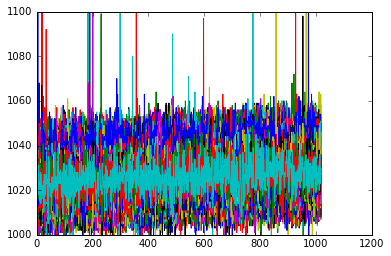

In [4]:
#pics


plt.plot(bias1)
plt.ylim(1000,1100)
plt.show()


[ 1044.  1039.  1040. ...,  1015.  1025.  1019.]


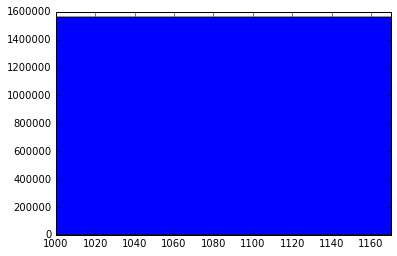

In [5]:
a = bias2.flatten()
print a
plt.hist(bias2.flatten(),bins=5)
plt.xlim(1000,1170)
plt.show()


In [6]:
#variance
b3 = bias1 - bias2
b3sq = b3**2
meanb3sq = np.mean(b3sq)
meanb3 = np.mean(b3)
var_b = meanb3sq - meanb3**2
print var_b

f3 = flat1 - flat2
f3sq = f3**2
meanf3 = np.mean(f3)
meanf3sq = np.mean(f3sq)
var_f = meanf3sq - meanf3**2
print var_f

78.3538872324
20718.0468451


In [7]:
#gain and readnoise
fmean1 = np.mean(flat1)
fmean2 = np.mean(flat2)
bmean1 = np.mean(bias1)
bmean2 = np.mean(bias2)
gain = ((fmean1+fmean2)-(bmean1+bmean2))/(var_f-var_b)

readnoise = gain*np.sqrt(var_b)/np.sqrt(2)
print 'gain =', gain
print 'readnoise =', readnoise

gain = 2.74971200546
readnoise = 17.2108565808


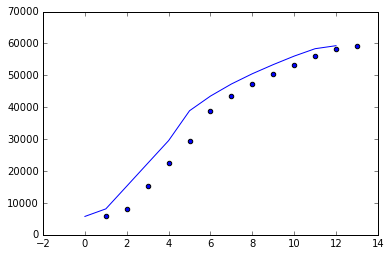

In [53]:
#Linearity
FlatField1 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000001.FlatField.fit'))
#print FlatField1

FlatField2 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000002.FlatField.fit'))
#print FlatField2

FlatField3 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000003.FlatField.fit'))
#print FlatField3

FlatField4 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000004.FlatField.fit'))
#print FlatField4

FlatField5 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000005.FlatField.fit'))
#print FlatField5

FlatField6 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000006.FlatField.fit'))
#print FlatField6

FlatField7 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000007.FlatField.fit'))
#print FlatField7

FlatField8 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000008.FlatField.fit'))
#print FlatField8

FlatField9 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000009.FlatField.fit'))
#print FlatField9

FlatField10 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000010.FlatField.fit'))
#print FlatField10

FlatField11 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000011.FlatField.fit'))
#print FlatField11

FlatField12 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000012.FlatField.fit'))
#print FlatField12

FlatField13 = np.float64(fits.getdata('/Users/beechamb/ccd/lin.00000013.FlatField.fit'))
#print FlatField13

root = '/Users/beechamb/ccd/'
linearityfiles = [FlatField1,\
                 FlatField2,\
                 FlatField3,\
                 FlatField4,\
                 FlatField5,\
                 FlatField6,\
                 FlatField7,\
                 FlatField8,\
                 FlatField9,\
                 FlatField10,\
                 FlatField11,\
                 FlatField12,\
                 FlatField13]

mean1 = np.mean(FlatField1)
mean2 = np.mean(FlatField2)
mean3 = np.mean(FlatField3)
mean4 = np.mean(FlatField4)
mean5 = np.mean(FlatField5)
mean6 = np.mean(FlatField6)
mean7 = np.mean(FlatField7)
mean8 = np.mean(FlatField8)
mean9 = np.mean(FlatField9)
mean10 = np.mean(FlatField10)
mean11 = np.mean(FlatField11)
mean12 = np.mean(FlatField12)
mean13 = np.mean(FlatField13)



exptimes = [1,2,3,4,5,6,7,8,9,10,11,12,13]
linmeans = [mean1,\
           mean2,\
           mean3,\
           mean4,\
           mean5,\
           mean6,\
           mean7,\
           mean8,\
           mean9,\
           mean10,\
           mean11,\
           mean12,\
           mean13]

plt.figure()
plt.scatter(exptimes,linmeans)
plt.plot(linmeans)
plt.show()


#Getting Some data
#for files in linearityfiles:
#    lin.info
#    linheader = lin[0].header
#    lindata = lin[0].data
#    exptimes.append(linheader['EXPTIME'])
#    linmeans.append(np.mean(lindata))
    
#print exptimes
#print linmeans

In [64]:
#Lists
temps = []
means = []

#Dark Current Data
root = '/Users/beechamb/ccd/dark.'
filelist = [root + '00000001.Dark.fit',\
            root + '00000002.Dark.fit',\
           root + '00000003.Dark.fit',\
           root + '00000004.Dark.fit',\
           root + '00000005.Dark.fit',\
           root + '00000006.Dark.fit',\
           root + '00000007.Dark.fit',\
           root + '00000008.Dark.fit',\
           root + '00000009.Dark.fit',\
           root + '00000010.Dark.fit',\
           root + '00000011.Dark.fit',\
           root + '00000012.Dark.fit',\
           root + '00000013.Dark.fit',\
           root + '00000014.Dark.fit',\
           root + '00000015.Dark.fit',\
           root + '00000016.Dark.fit',\
           root + '00000017.Dark.fit',\
           root + '00000018.Dark.fit',\
           root + '00000019.Dark.fit',\
           root + '00000020.Dark.fit']

for files in filelist:
    dark = fits.open(files)
    dark.info
    darkheader = dark[0].header
    darkdata = dark[0].data
    temps.append(darkheader['CCD-TEMP'] + 273.15)
    means.append(np.mean(darkdata) -var_b)
    
#array
temps = np.array(temps)
means = np.array(means)
means += 3
print temps
print means


[ 262.94691596  263.36218273  268.74680286  273.76074283  277.1735177
  280.67815105  282.93091507  285.24365184  286.66485128  288.60475771
  289.59607829  291.11266805  292.14512777  292.6682382   293.7290506
  294.26710568  294.81050805  295.35945394  295.91414837  295.91414837]
[ 950.26598552  949.79762143  948.46079969  947.149406    946.47986223
  946.62317955  947.40948033  948.70153723  951.44234974  954.52040689
  957.66320774  961.16258106  964.84319172  968.56486031  972.43798667
  975.97571062  979.51164488  982.8219595   986.24952326  989.15304819]


[  3.35948528e+15  -1.19715754e+04]


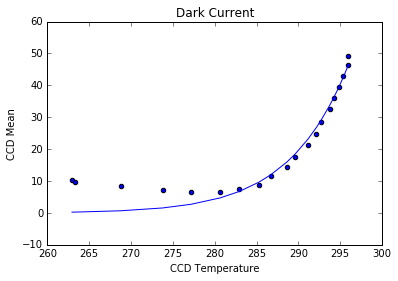

In [120]:
#PLOTS 4 DARK CURRENT
plt.figure()
plt.scatter(temps,means-940)
plt.xlabel('CCD Temperature')
plt.ylabel('CCD Mean')
plt.title('Dark Current')

#Func 4 dark current
k = 1.38*10**(-23)

def func(temps, a,b):
    return a*temps**(3.0/2.0)*np.exp((b)/(temps)) 

#fit
popt, pcov = curve_fit(func,temps,means-940, [1e5,-6564.],maxfev=100000)

print popt

plt.plot(temps,func(temps,*popt))

plt.show()

# Conclusions
The dark current seems to eventually have a linear progression, this could be due to the fact that not all of our fits files were as dark as we needed them to be at first.